In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

# Load the Our World in Data dataset
df = pd.read_csv(r"C:\Users\saifm\Downloads\total-ghg-emissions.csv")
df

,Entity,Code,Year,Annual greenhouse gas emissions
0,Afghanistan,AFG,1851,7373214.5
1,Afghanistan,AFG,1852,7422393.5
2,Afghanistan,AFG,1853,7483595.5
3,Afghanistan,AFG,1854,7532321.0
4,Afghanistan,AFG,1855,7580708.5
...,...,...,...,...
35221,Zimbabwe,ZWE,2017,37999464.0
35222,Zimbabwe,ZWE,2018,39079344.0
35223,Zimbabwe,ZWE,2019,38701420.0
35224,Zimbabwe,ZWE,2020,37733230.0


In [3]:
# Drop rows with missing values
df = df.dropna()

# Drop unnecessary columns
df = df.drop('Code', axis=1)
df

,Entity,Year,Annual greenhouse gas emissions
0,Afghanistan,1851,7373214.5
1,Afghanistan,1852,7422393.5
2,Afghanistan,1853,7483595.5
3,Afghanistan,1854,7532321.0
4,Afghanistan,1855,7580708.5
...,...,...,...
35221,Zimbabwe,2017,37999464.0
35222,Zimbabwe,2018,39079344.0
35223,Zimbabwe,2019,38701420.0
35224,Zimbabwe,2020,37733230.0


C:\Users\saifm\AppData\Local\Temp\ipykernel_36004\3443521785.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total GHG Emissions'] = df.iloc[:, 1:].sum(axis=1)


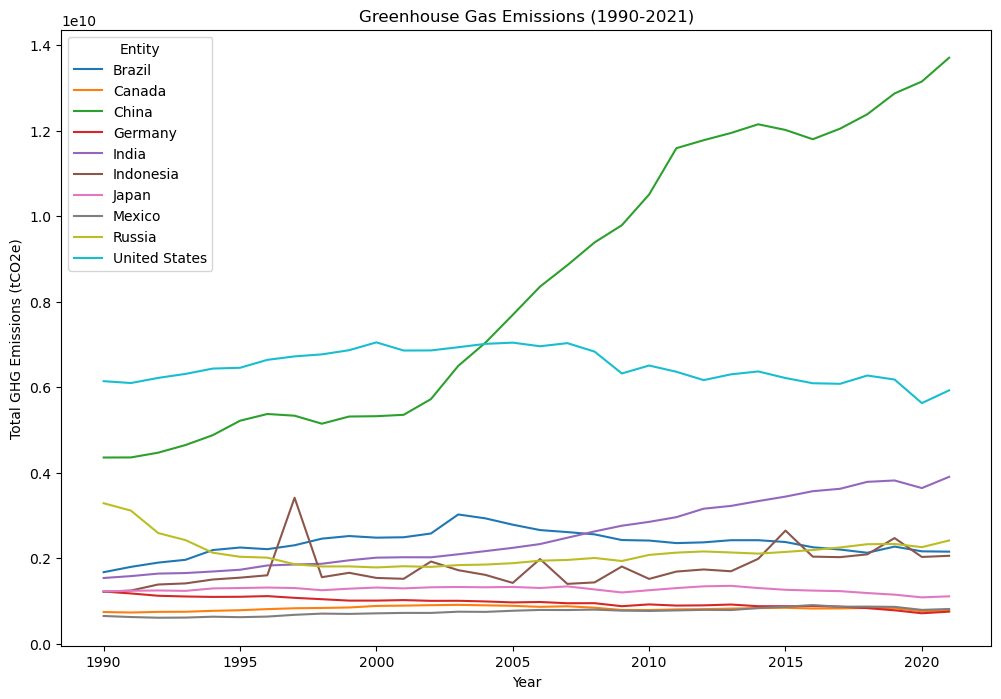

In [4]:
# Subset the data to only include years from 1990 to 2021
df = df.loc[df['Year'].between(1990, 2021)]

#new column for total emissions by summing emissions across all countries
df['Total GHG Emissions'] = df.iloc[:, 1:].sum(axis=1)

#Filter out World Emissions for time-being for plotting purposes
df = df[df['Entity'] != 'World']

# Group the data by country and sum the total emissions for each country
grouped_df = df.groupby('Entity')['Total GHG Emissions'].sum()

# Sort the data in descending order and select the top 10 emitting countries
top_emitters = grouped_df.sort_values(ascending=False)[:10]

# Create a new dataframe that only includes data for the top 10 emitting countries
top_emitters_df = df.loc[df['Entity'].isin(top_emitters.index)]

# Pivot the data so that it is in a format that is easy to plot
pivoted_df = top_emitters_df.pivot(index='Year', columns='Entity', values='Total GHG Emissions')

# Plot the data as line charts
pivoted_df.plot(kind='line', figsize=(12,8))
plt.title('Greenhouse Gas Emissions (1990-2021)')
plt.xlabel('Year')
plt.ylabel('Total GHG Emissions (tCO2e)')
plt.show()

In [5]:
print(top_emitters)

Entity
China            2.690679e+11
United States    2.076265e+11
India            8.129479e+10
Brazil           7.522471e+10
Russia           6.828952e+10
Indonesia        5.673810e+10
Japan            4.038980e+10
Germany          3.085996e+10
Canada           2.619053e+10
Mexico           2.380778e+10
Name: Total GHG Emissions, dtype: float64


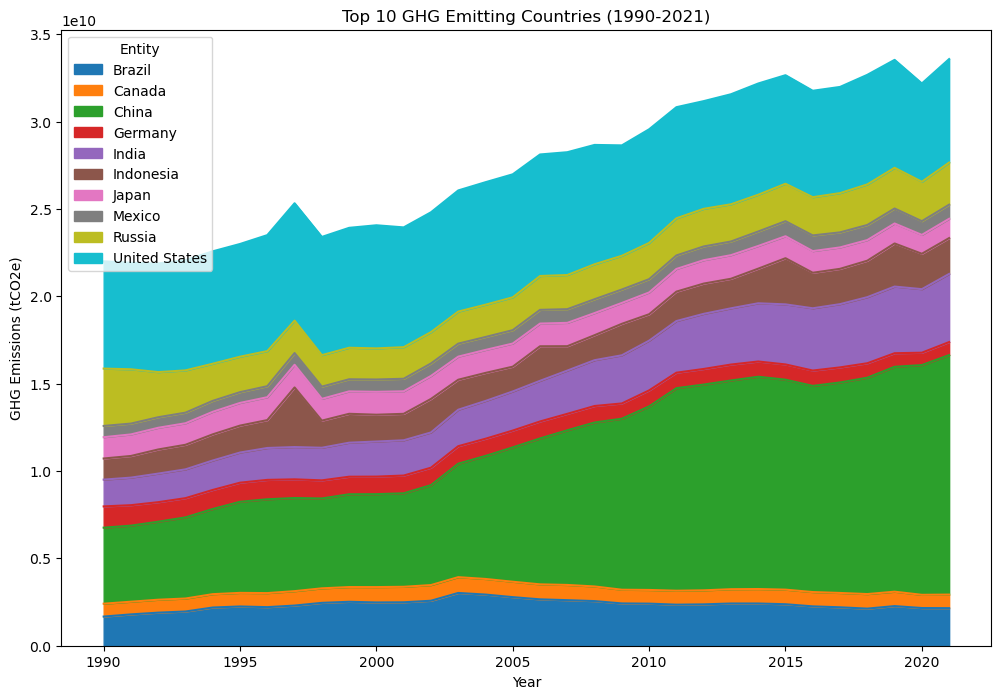

In [7]:
# Create the stacked area chart
ax = pivoted_df.plot.area(stacked=True, figsize=(12,8))

# Set the title and axis labels
ax.set_title('Top 10 GHG Emitting Countries (1990-2021)')
ax.set_xlabel('Year')
ax.set_ylabel('GHG Emissions (tCO2e)')

# Show the plot
plt.show()